# Parameter Analysis #
## Dataset: Electronics (Amazon Rating Data)

## Import the libraries

In [1]:
#Import the necessary libraries and Packages
from surprise import *
import pandas as pd
from surprise import accuracy
from surprise.model_selection.split import train_test_split
from surprise.model_selection import cross_validate, GridSearchCV
from random import sample
from sklearn.tree import DecisionTreeRegressor
import sklearn.metrics as metrics
import sklearn
import math
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np

## Read the dataset

In [2]:
df = pd.read_csv("Datasets/Electronics.csv",header=None)
df.columns = ["User","Item","Rating"]

In [3]:
df.describe()

,Rating
count,2.099435e+07
mean,4.073685e+00
std,1.385792e+00
min,1.000000e+00
25%,4.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


## Preprocessing
Convert the user id and item id from string format to integer format

In [4]:
user=df["User"]

In [5]:
user=user.drop_duplicates()

In [6]:
uid = [*range(1,len(user)+1)]

In [7]:
user_dict=dict(zip(user,uid))

In [8]:
x=[]
for i in df['User']:
    x.append(user_dict[i])
len(x)

20994353

In [9]:
df.insert(1,"UID",x,True)

In [10]:
df=df.drop('User',axis=1)

In [11]:
item=df["Item"]

In [12]:
item=item.drop_duplicates()

In [13]:
iid = [*range(1,len(item)+1)]

In [14]:
item_dict=dict(zip(item,iid))

In [15]:
x=[]
for i in df['Item']:
    x.append(item_dict[i])
len(x)

20994353

In [16]:
df.insert(2,"IID",x,True)

In [17]:
df=df.drop('Item',axis=1)

In [18]:
df

,UID,IID,Rating
0,1,1,5.0
1,1,2,5.0
2,1,3,5.0
3,1,4,4.0
4,1,5,5.0
...,...,...,...
20994348,185278,9838673,1.0
20994349,185278,9838674,5.0
20994350,185278,77151,5.0
20994351,185278,9838675,5.0


## Sampling
User filtering

In [19]:
unique_users=df.drop_duplicates(subset=["UID"])

Random Sampling

In [20]:

sim_rand_df = df.sample(n=500000, random_state = 1)
sim_rand_df.head()

,UID,IID,Rating
3354375,34540,2004161,5.0
15587926,158318,5113186,5.0
14141511,142216,3856824,5.0
3578252,37038,2135281,1.0
18064014,29607,388650,5.0


Stratified Sampling

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit
strat_split = StratifiedShuffleSplit(n_splits=2, test_size=0.07, random_state=42)
for train_index, test_index in strat_split.split(df, df["Rating"]):
    strat_train_set = df.loc[train_index]
    strat_data = df.loc[test_index]
strat_data.head()

,UID,IID,Rating
4728833,48450,561041,5.0
15631765,158671,3308689,4.0
1508759,18464,1139650,1.0
7943485,79252,4439881,5.0
20698220,169521,9727789,1.0


## Graph Functions
Line Graph

In [23]:
def plot_graph(factor_list,accuracy_list,xlabel,ylabel,title):
    plt.plot(factors_list,accuracy_list)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

Bar Graph

In [24]:
def plot_bar(dataset_labels,rmse_avg,mse_avg,mae_avg):
    x = np.arange(len(dataset_labels))
    width=0.2
    fig, ax = plt.subplots()
    rmse_bar = ax.bar(x - width/2, rmse_avg, width, label='RMSE')
    mse_bar = ax.bar(x + width/2, mse_avg, width, label='MSE')
    mae_bar = ax.bar(x + 1.5*width, mae_avg, width, label='MAE')
    ax.set_ylabel('Accuracy Scores')
    ax.set_title('Scores by Sample')
    ax.set_xticks(x)
    ax.set_xticklabels(dataset_labels)
    ax.legend()
    fig.tight_layout()
    plt.show()

## Model, Prediction and Evaluation

In [25]:
dataset_list=[sim_rand_df,unique_users,strat_data]
dataset_labels=["Simple Random Sample", "Unique Users Sample", "Stratified Sample"]
reader = Reader(rating_scale=(0,5))

SVD Algorithm

Simple Random Sample
10
RMSE: 1.3488
MSE: 1.8192
MAE:  1.0667
20
RMSE: 1.3490
MSE: 1.8198
MAE:  1.0670
30
RMSE: 1.3490
MSE: 1.8199
MAE:  1.0672
40
RMSE: 1.3491
MSE: 1.8202
MAE:  1.0674
50
RMSE: 1.3490
MSE: 1.8197
MAE:  1.0674
60
RMSE: 1.3492
MSE: 1.8202
MAE:  1.0676
70
RMSE: 1.3491
MSE: 1.8201
MAE:  1.0679
80
RMSE: 1.3492
MSE: 1.8204
MAE:  1.0678
90
RMSE: 1.3492
MSE: 1.8203
MAE:  1.0681
100
RMSE: 1.3494
MSE: 1.8209
MAE:  1.0685
110
RMSE: 1.3496
MSE: 1.8215
MAE:  1.0688
120
RMSE: 1.3496
MSE: 1.8215
MAE:  1.0688
130
RMSE: 1.3497
MSE: 1.8218
MAE:  1.0690
140
RMSE: 1.3498
MSE: 1.8218
MAE:  1.0691
150
RMSE: 1.3497
MSE: 1.8218
MAE:  1.0691
160
RMSE: 1.3500
MSE: 1.8224
MAE:  1.0694
170
RMSE: 1.3501
MSE: 1.8227
MAE:  1.0696
180
RMSE: 1.3497
MSE: 1.8216
MAE:  1.0695
190
RMSE: 1.3499
MSE: 1.8222
MAE:  1.0696
200
RMSE: 1.3500
MSE: 1.8225
MAE:  1.0700
210
RMSE: 1.3500
MSE: 1.8225
MAE:  1.0698
220
RMSE: 1.3504
MSE: 1.8235
MAE:  1.0702
230
RMSE: 1.3502
MSE: 1.8230
MAE:  1.0701
240
RMSE: 1.3507
MSE: 

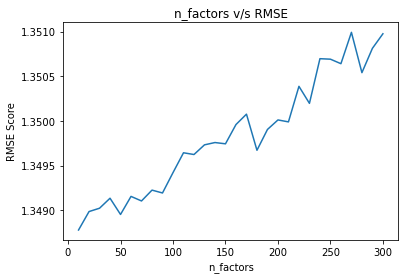

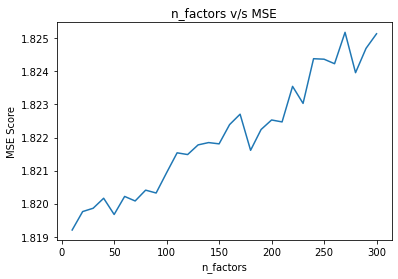

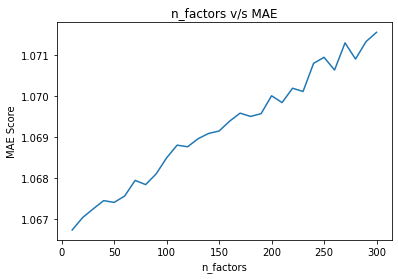

Unique Users Sample
10
RMSE: 1.5770
MSE: 2.4870
MAE:  1.3147
20
RMSE: 1.5771
MSE: 2.4871
MAE:  1.3148
30
RMSE: 1.5771
MSE: 2.4872
MAE:  1.3148
40
RMSE: 1.5771
MSE: 2.4873
MAE:  1.3149
50
RMSE: 1.5772
MSE: 2.4874
MAE:  1.3149
60
RMSE: 1.5772
MSE: 2.4875
MAE:  1.3150
70
RMSE: 1.5772
MSE: 2.4875
MAE:  1.3149
80
RMSE: 1.5772
MSE: 2.4876
MAE:  1.3150
90
RMSE: 1.5773
MSE: 2.4877
MAE:  1.3150
100
RMSE: 1.5773
MSE: 2.4878
MAE:  1.3151
110
RMSE: 1.5773
MSE: 2.4879
MAE:  1.3151
120
RMSE: 1.5773
MSE: 2.4880
MAE:  1.3152
130
RMSE: 1.5774
MSE: 2.4880
MAE:  1.3152
140
RMSE: 1.5774
MSE: 2.4881
MAE:  1.3152
150
RMSE: 1.5774
MSE: 2.4883
MAE:  1.3153
160
RMSE: 1.5774
MSE: 2.4883
MAE:  1.3153
170
RMSE: 1.5775
MSE: 2.4884
MAE:  1.3153
180
RMSE: 1.5775
MSE: 2.4885
MAE:  1.3154
190
RMSE: 1.5775
MSE: 2.4885
MAE:  1.3154
200
RMSE: 1.5776
MSE: 2.4887
MAE:  1.3154
210
RMSE: 1.5776
MSE: 2.4888
MAE:  1.3155
220
RMSE: 1.5776
MSE: 2.4889
MAE:  1.3155
230
RMSE: 1.5776
MSE: 2.4890
MAE:  1.3155
240
RMSE: 1.5776
MSE: 2

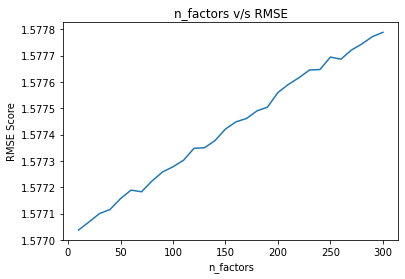

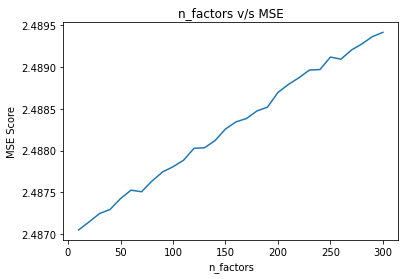

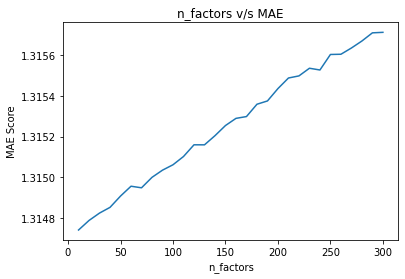

Stratified Sample
10
RMSE: 1.3369
MSE: 1.7873
MAE:  1.0529
20
RMSE: 1.3370
MSE: 1.7876
MAE:  1.0531
30
RMSE: 1.3373
MSE: 1.7885
MAE:  1.0535
40
RMSE: 1.3373
MSE: 1.7884
MAE:  1.0534
50
RMSE: 1.3377
MSE: 1.7893
MAE:  1.0540
60
RMSE: 1.3376
MSE: 1.7890
MAE:  1.0540
70
RMSE: 1.3377
MSE: 1.7893
MAE:  1.0542
80
RMSE: 1.3383
MSE: 1.7912
MAE:  1.0547
90
RMSE: 1.3378
MSE: 1.7898
MAE:  1.0543
100
RMSE: 1.3382
MSE: 1.7907
MAE:  1.0545
110
RMSE: 1.3385
MSE: 1.7917
MAE:  1.0549
120
RMSE: 1.3384
MSE: 1.7912
MAE:  1.0550
130
RMSE: 1.3384
MSE: 1.7914
MAE:  1.0551
140
RMSE: 1.3389
MSE: 1.7927
MAE:  1.0556
150
RMSE: 1.3386
MSE: 1.7919
MAE:  1.0555
160
RMSE: 1.3389
MSE: 1.7928
MAE:  1.0557
170
RMSE: 1.3392
MSE: 1.7935
MAE:  1.0562
180
RMSE: 1.3392
MSE: 1.7934
MAE:  1.0561
190
RMSE: 1.3393
MSE: 1.7938
MAE:  1.0564
200
RMSE: 1.3396
MSE: 1.7945
MAE:  1.0567
210
RMSE: 1.3397
MSE: 1.7947
MAE:  1.0566
220
RMSE: 1.3401
MSE: 1.7958
MAE:  1.0571
230
RMSE: 1.3396
MSE: 1.7946
MAE:  1.0567
240
RMSE: 1.3400
MSE: 1.7

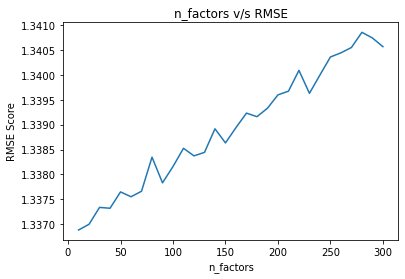

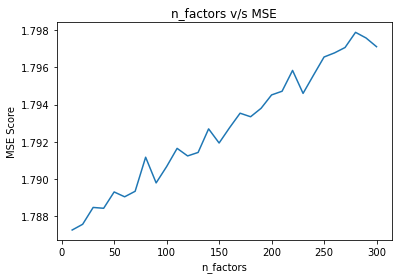

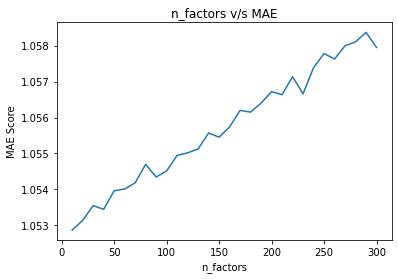

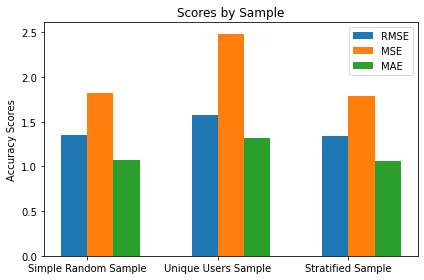

In [26]:
index=0
rmse_avg=[]
mse_avg=[]
mae_avg=[]
for dataset in dataset_list:
    print(dataset_labels[index])
    index=index+1
    data=Dataset.load_from_df(dataset,reader)
    train_df, test_df = train_test_split(data, test_size=0.1,shuffle=False)
    factors_list=[*range(10,310,10)]
    mse_list=[]
    rmse_list=[]
    mae_list=[]
    for i in factors_list:
        print(i)
        svd_algo = SVD(n_factors=i)    
        svd_algo.fit(train_df)                                        
        prediction = svd_algo.test(test_df)
        rmse_list.append(accuracy.rmse(prediction,verbose=True))
        mse_list.append(accuracy.mse(prediction,verbose=True))
        mae_list.append(accuracy.mae(prediction,verbose=True))
    
    rmse_avg.append(sum(rmse_list)/len(rmse_list))
    mse_avg.append(sum(mse_list)/len(mse_list))
    mae_avg.append(sum(mae_list)/len(mae_list))
    
    plot_graph(factors_list,rmse_list,"n_factors","RMSE Score","n_factors v/s RMSE")
    plot_graph(factors_list,mse_list,"n_factors","MSE Score","n_factors v/s MSE")
    plot_graph(factors_list,mae_list,"n_factors","MAE Score","n_factors v/s MAE")
    '''include bar graph'''
plot_bar(dataset_labels,rmse_avg,mse_avg,mae_avg)

NMF Algorithm

Simple Random Sample
10
RMSE: 1.4264
MSE: 2.0346
MAE:  1.1487
20
RMSE: 1.4074
MSE: 1.9809
MAE:  1.1252
30
RMSE: 1.4024
MSE: 1.9666
MAE:  1.1138
40
RMSE: 1.4008
MSE: 1.9623
MAE:  1.1082
50
RMSE: 1.4003
MSE: 1.9609
MAE:  1.1049
60
RMSE: 1.4002
MSE: 1.9606
MAE:  1.1030
70
RMSE: 1.4002
MSE: 1.9605
MAE:  1.1019
80
RMSE: 1.4002
MSE: 1.9605
MAE:  1.1011
90
RMSE: 1.4005
MSE: 1.9613
MAE:  1.1009
100
RMSE: 1.4002
MSE: 1.9606
MAE:  1.1004
110
RMSE: 1.4002
MSE: 1.9606
MAE:  1.1000
120
RMSE: 1.4003
MSE: 1.9609
MAE:  1.0998
130
RMSE: 1.4004
MSE: 1.9611
MAE:  1.0997
140
RMSE: 1.4003
MSE: 1.9609
MAE:  1.0995
150
RMSE: 1.4004
MSE: 1.9612
MAE:  1.0994
160
RMSE: 1.4004
MSE: 1.9611
MAE:  1.0991
170
RMSE: 1.4003
MSE: 1.9607
MAE:  1.0989
180
RMSE: 1.4004
MSE: 1.9612
MAE:  1.0991
190
RMSE: 1.4002
MSE: 1.9607
MAE:  1.0988
200
RMSE: 1.4003
MSE: 1.9609
MAE:  1.0987
210
RMSE: 1.4003
MSE: 1.9609
MAE:  1.0986
220
RMSE: 1.4003
MSE: 1.9609
MAE:  1.0987
230
RMSE: 1.4004
MSE: 1.9611
MAE:  1.0987
240
RMSE: 1.4003
MSE: 

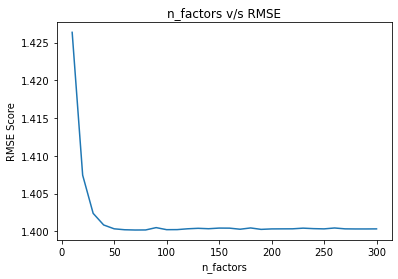

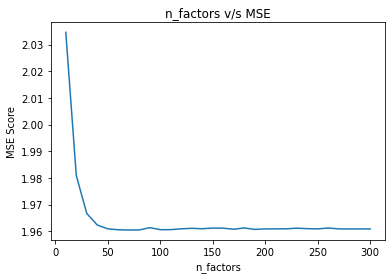

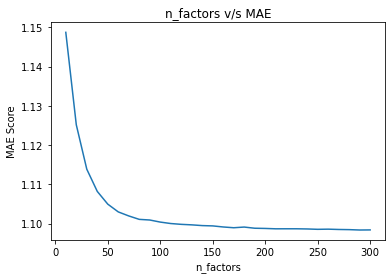

Unique Users Sample
10
RMSE: 1.5814
MSE: 2.5008
MAE:  1.3204
20
RMSE: 1.5814
MSE: 2.5008
MAE:  1.3204
30
RMSE: 1.5814
MSE: 2.5008
MAE:  1.3204
40
RMSE: 1.5814
MSE: 2.5008
MAE:  1.3204
50
RMSE: 1.5814
MSE: 2.5008
MAE:  1.3204
60
RMSE: 1.5814
MSE: 2.5008
MAE:  1.3204
70
RMSE: 1.5814
MSE: 2.5008
MAE:  1.3204
80
RMSE: 1.5814
MSE: 2.5008
MAE:  1.3204
90
RMSE: 1.5814
MSE: 2.5008
MAE:  1.3204
100
RMSE: 1.5814
MSE: 2.5008
MAE:  1.3204
110
RMSE: 1.5814
MSE: 2.5008
MAE:  1.3204
120
RMSE: 1.5814
MSE: 2.5008
MAE:  1.3204
130
RMSE: 1.5814
MSE: 2.5008
MAE:  1.3204
140
RMSE: 1.5814
MSE: 2.5008
MAE:  1.3204
150
RMSE: 1.5814
MSE: 2.5008
MAE:  1.3204
160
RMSE: 1.5814
MSE: 2.5008
MAE:  1.3204
170
RMSE: 1.5814
MSE: 2.5008
MAE:  1.3204
180
RMSE: 1.5814
MSE: 2.5008
MAE:  1.3204
190
RMSE: 1.5814
MSE: 2.5008
MAE:  1.3204
200
RMSE: 1.5814
MSE: 2.5008
MAE:  1.3204
210
RMSE: 1.5814
MSE: 2.5008
MAE:  1.3204
220
RMSE: 1.5814
MSE: 2.5008
MAE:  1.3204
230
RMSE: 1.5814
MSE: 2.5008
MAE:  1.3204
240
RMSE: 1.5814
MSE: 2

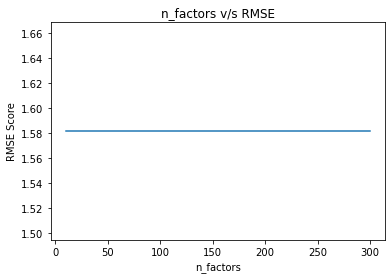

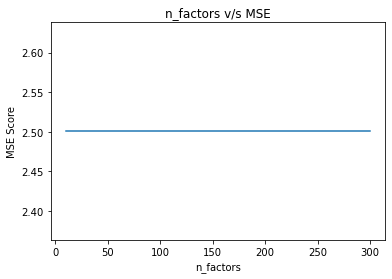

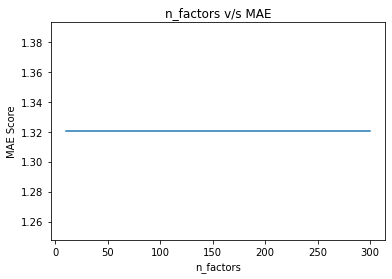

Stratified Sample
10
RMSE: 1.4703
MSE: 2.1617
MAE:  1.1853
20
RMSE: 1.4334
MSE: 2.0546
MAE:  1.1334
30
RMSE: 1.4223
MSE: 2.0228
MAE:  1.1082
40
RMSE: 1.4196
MSE: 2.0154
MAE:  1.0961
50
RMSE: 1.4195
MSE: 2.0148
MAE:  1.0898
60
RMSE: 1.4190
MSE: 2.0134
MAE:  1.0859
70
RMSE: 1.4191
MSE: 2.0140
MAE:  1.0836
80
RMSE: 1.4190
MSE: 2.0136
MAE:  1.0818
90
RMSE: 1.4194
MSE: 2.0146
MAE:  1.0810
100
RMSE: 1.4194
MSE: 2.0148
MAE:  1.0802
110
RMSE: 1.4195
MSE: 2.0149
MAE:  1.0794
120
RMSE: 1.4194
MSE: 2.0147
MAE:  1.0790
130
RMSE: 1.4196
MSE: 2.0154
MAE:  1.0787
140
RMSE: 1.4194
MSE: 2.0147
MAE:  1.0781
150
RMSE: 1.4198
MSE: 2.0158
MAE:  1.0780
160
RMSE: 1.4199
MSE: 2.0161
MAE:  1.0778
170
RMSE: 1.4198
MSE: 2.0157
MAE:  1.0774
180
RMSE: 1.4199
MSE: 2.0162
MAE:  1.0773
190
RMSE: 1.4199
MSE: 2.0161
MAE:  1.0771
200
RMSE: 1.4199
MSE: 2.0162
MAE:  1.0769
210
RMSE: 1.4200
MSE: 2.0164
MAE:  1.0769
220
RMSE: 1.4200
MSE: 2.0164
MAE:  1.0767
230
RMSE: 1.4200
MSE: 2.0164
MAE:  1.0766
240
RMSE: 1.4200
MSE: 2.0

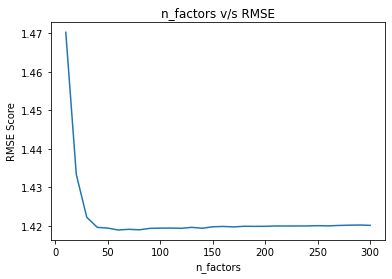

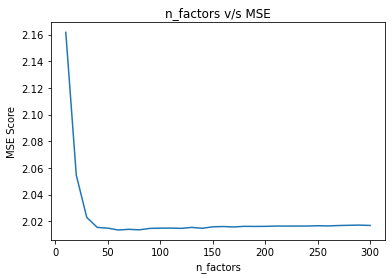

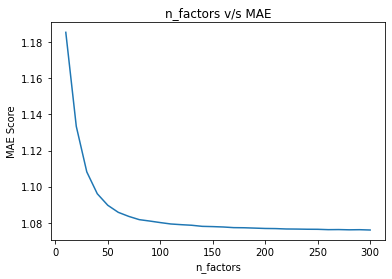

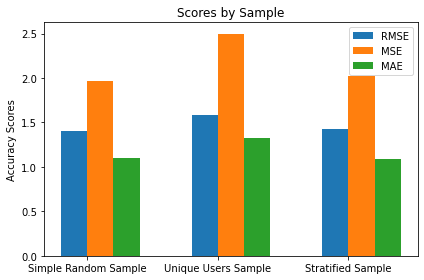

In [27]:
index=0
rmse_avg=[]
mse_avg=[]
mae_avg=[]
for dataset in dataset_list:
    print(dataset_labels[index])
    index=index+1
    data=Dataset.load_from_df(dataset,reader)
    train_df, test_df = train_test_split(data, test_size=0.1,shuffle=False)
    factors_list=[*range(10,310,10)]
    mse_list=[]
    rmse_list=[]
    mae_list=[]
    for i in factors_list:
        print(i)
        nmf_algo = NMF(n_factors=i)    
        nmf_algo.fit(train_df)                                        
        prediction = nmf_algo.test(test_df)
        rmse_list.append(accuracy.rmse(prediction,verbose=True))
        mse_list.append(accuracy.mse(prediction,verbose=True))
        mae_list.append(accuracy.mae(prediction,verbose=True))
    
    rmse_avg.append(sum(rmse_list)/len(rmse_list))
    mse_avg.append(sum(mse_list)/len(mse_list))
    mae_avg.append(sum(mae_list)/len(mae_list))
    
    plot_graph(factors_list,rmse_list,"n_factors","RMSE Score","n_factors v/s RMSE")
    plot_graph(factors_list,mse_list,"n_factors","MSE Score","n_factors v/s MSE")
    plot_graph(factors_list,mae_list,"n_factors","MAE Score","n_factors v/s MAE")
    '''include bar graph'''
plot_bar(dataset_labels,rmse_avg,mse_avg,mae_avg)

Decision Tree Algorithm

Simple Random Sample
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


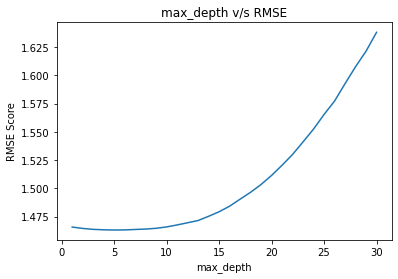

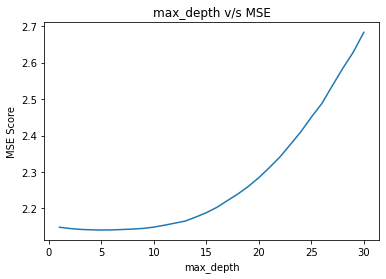

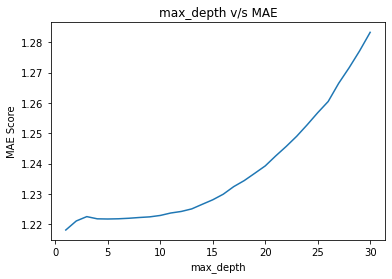

Unique Users Sample
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


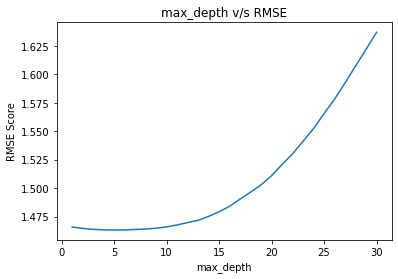

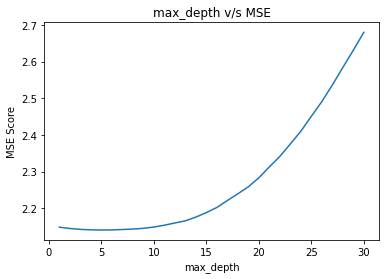

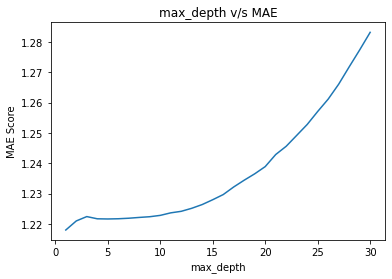

Stratified Sample
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


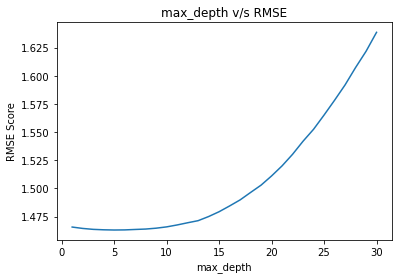

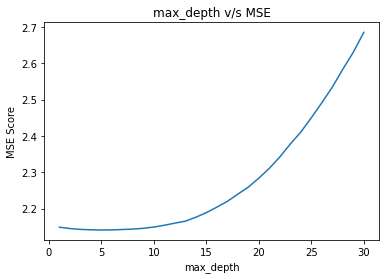

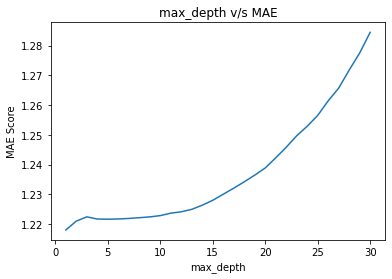

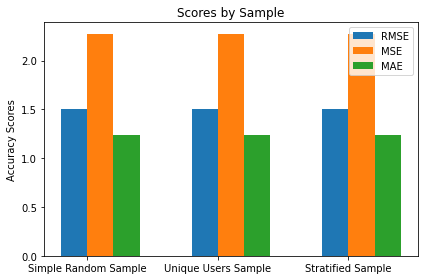

In [28]:
index=0
rmse_avg=[]
mse_avg=[]
mae_avg=[]
for dataset in dataset_list:
    print(dataset_labels[index])
    index=index+1
    X = unique_users.drop(columns=['Rating'])
    y = unique_users['Rating']
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=0)
    
    factors_list=[*range(1,31,1)]
    mse_list=[]
    rmse_list=[]
    mae_list=[]
    for i in factors_list:
        print(i)
        regr = DecisionTreeRegressor(max_depth=i)
        regr.fit(X_train, y_train)
        y_pred = regr.predict(X_test)
        rmse_list.append(math.sqrt(metrics.mean_squared_error(y_test, y_pred)))
        mse_list.append(metrics.mean_squared_error(y_test, y_pred))
        mae_list.append(metrics.mean_absolute_error(y_test, y_pred))
    
    rmse_avg.append(sum(rmse_list)/len(rmse_list))
    mse_avg.append(sum(mse_list)/len(mse_list))
    mae_avg.append(sum(mae_list)/len(mae_list))
    
    plot_graph(factors_list,rmse_list,"max_depth","RMSE Score","max_depth v/s RMSE")
    plot_graph(factors_list,mse_list,"max_depth","MSE Score","max_depth v/s MSE")
    plot_graph(factors_list,mae_list,"max_depth","MAE Score","max_depth v/s MAE")
    
plot_bar(dataset_labels,rmse_avg,mse_avg,mae_avg)

Random Forest Algorithm

Simple Random Sample
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


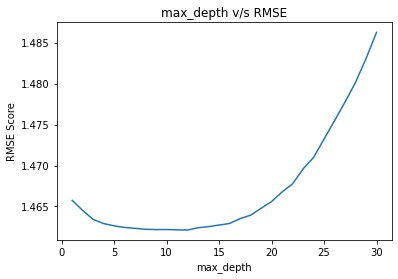

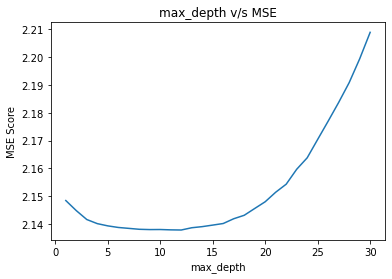

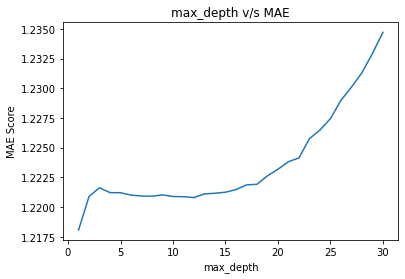

Unique Users Sample
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


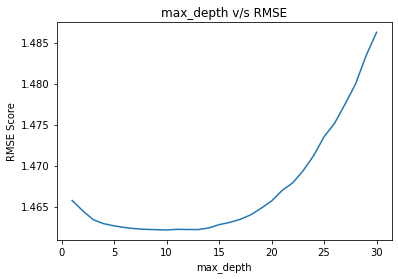

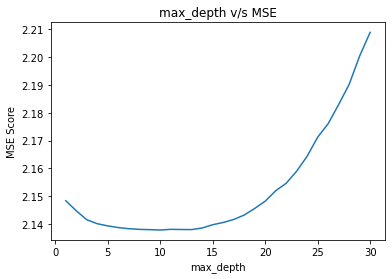

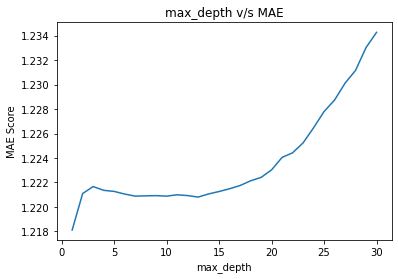

Stratified Sample
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


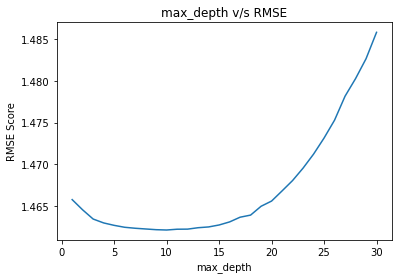

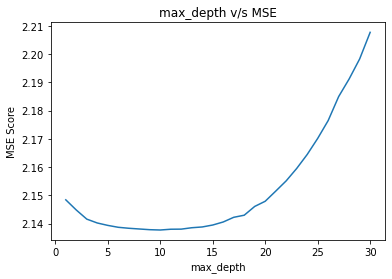

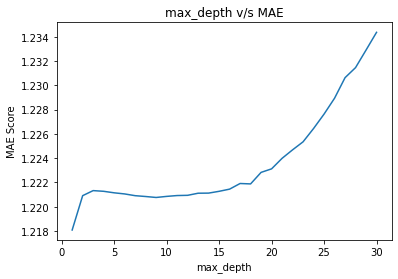

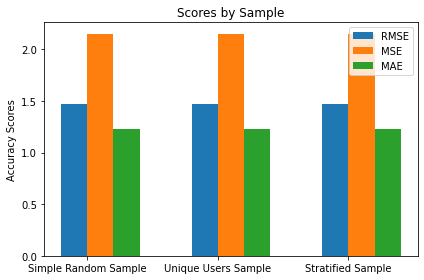

In [29]:
index=0
rmse_avg=[]
mse_avg=[]
mae_avg=[]
for dataset in dataset_list:
    print(dataset_labels[index])
    index=index+1
    X = unique_users.drop(columns=['Rating'])
    y = unique_users['Rating']
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=0)
    
    factors_list=[*range(1,31,1)]
    mse_list=[]
    rmse_list=[]
    mae_list=[]
    for i in factors_list:
        print(i)
        regrRandom = RandomForestRegressor(max_depth=i)
        regrRandom.fit(X_train, y_train)
        y_predR = regrRandom.predict(X_test)
        rmse_list.append(math.sqrt(metrics.mean_squared_error(y_test, y_predR)))
        mse_list.append(metrics.mean_squared_error(y_test, y_predR))
        mae_list.append(metrics.mean_absolute_error(y_test, y_predR))
    
    rmse_avg.append(sum(rmse_list)/len(rmse_list))
    mse_avg.append(sum(mse_list)/len(mse_list))
    mae_avg.append(sum(mae_list)/len(mae_list))
    
    plot_graph(factors_list,rmse_list,"max_depth","RMSE Score","max_depth v/s RMSE")
    plot_graph(factors_list,mse_list,"max_depth","MSE Score","max_depth v/s MSE")
    plot_graph(factors_list,mae_list,"max_depth","MAE Score","max_depth v/s MAE")
    
plot_bar(dataset_labels,rmse_avg,mse_avg,mae_avg)